In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

37005820.34763318
20101657.97014334
9925592.81897064
4069896.1332964343
915194.9425495183
-608320.7158875037
-4.0466052036795
413785.2422101891
-4.0466052036795
196667.3361760461
-4.0466052036795
95862.66839528077
-4.0466052036795
47322.58787456953
-4.0466052036795
23508.905430765473
-4.0466052036795
11715.041776777436
-4.0466052036795
5846.141233555129
-4.0466052036795
2918.7159411449334
-4.0466052036795
1456.752318626746
-4.0466052036795
726.2074124231743
-4.0466052036795
361.0440730655441
-4.0466052036795
178.48966966230535
-4.0466052036795
87.21923697633379
-4.0466052036795
41.5857787463539
-4.0466052036795
18.769446889266135
-4.0466052036795
7.361386000604604
-4.0466052036795
1.6573853753524583
-4.0466052036795
-1.1946113380330086
-4.0466052036795
-2.620608140127023
-4.0466052036795
-3.333606808894061
-4.0466052036795
-3.690106198093322
-4.0466052036795
-3.8683555790462063
-4.0466052036795
-3.957480438004601
-3.912917995382463
-3.8906365549421693
-3.8794959261805326
-3.87392597385

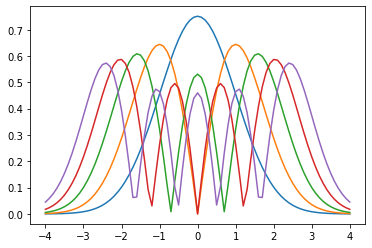

In [15]:
A1 = []
A2 = []

K = 1
L = 4

def shoot(phi, x, epsilon):
    return [phi[1], (K * x ** 2 - epsilon) * phi[0]]

xspan = np.linspace(-L, L, 81) 
col = ['r', 'b', 'g', 'c', 'm', 'k']
tol = 1e-4
initial_epsilon = 0.1



for modes in range(1,6):
    epsilon = initial_epsilon
    d_epsilon = 0.2
    for i in range(1000):
        A = np.sqrt(K * L ** 2 - epsilon)
        phi0 = [1,A]
        #print(A)
        phi = odeint(shoot, phi0, xspan, args=(epsilon,))
        #print(phi[:,0])

        alpha = np.sqrt(K * L ** 2 - epsilon)

        #print(phi)
        print((phi[-1,1]))
        #print(phi[-1,0])


        if abs(phi[-1,1] + alpha * phi[-1,0]) < tol:
            #print(epsilon)
            break

        if (-1) ** (modes+1) * (phi[-1,1] + alpha * phi[-1,0]) > 0:
            epsilon += d_epsilon
        else:
            epsilon -= d_epsilon/2
            d_epsilon /= 2

    #print(epsilon)
    initial_epsilon = epsilon + 0.2
    norm = np.trapz(phi[:,0] ** 2, xspan)
    norm_eigenfun = np.abs(phi[:,0] / np.sqrt(norm))



    #print(phi[:,0])
    # check if normalization is correct

    #if np.trapz(np.abs(norm_eigenfun) **2, xspan) - 1 > 1e-4:
    #print(np.trapz(np.abs(norm_eigenfun) **2, xspan))




    #print((norm_eigenfun))
    A1.append(norm_eigenfun)
    A2.append(epsilon)
    plt.plot(xspan, norm_eigenfun)

A1 = np.array(A1).T
A2 = np.array(A2)
#print(A1)
#print(A2)
rows, columns = A1.shape
#print(rows, columns)


